In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [309]:
def generate_data(n, slope, intercept, X_mean = 0, X_std = 1, nlevel = 0.5):
    
    X = X_std * np.random.randn(n) + X_mean
    noise = np.random.randn(n)
    
    y = slope * X + intercept + noise
    
    return X, y

In [310]:
X, y = generate_data(n = 100, slope = 1.5, intercept = -3)
X_test, y_test = generate_data(n = 20, slope = 1.5, intercept = -3)

#### Plot of generated data

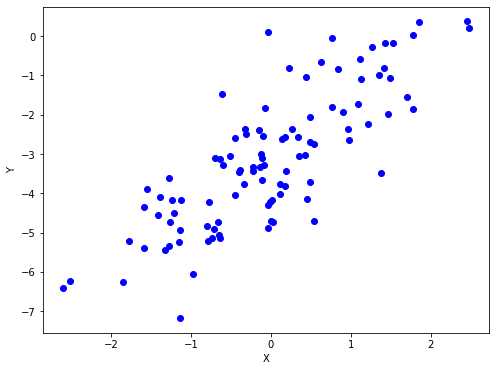

In [311]:
plt.figure(figsize=(8, 6))
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, y, "bo");

### Regression equation
$$y = m\cdot x + b$$
where,  
$y$ - estimated value  
$x$ - independent variable  
$m$ - regression coefficient  
$b$ - bias

### Cost function
$$MSE:=\frac{1}{n}\sum^{n}_{i=1}(y_i-\bar{y}_i)^2$$

#### Partial derivatives of cost function
$$\frac{\partial}{\partial m}=-\frac{2}{N}\sum^{N}_{i=1}x_i(y_i-(mx_i+b))$$
$$\frac{\partial}{\partial b}=-\frac{2}{N}\sum^{N}_{i=1}(y_i-(mx_i+b))$$

In [312]:
def mse(y_true, y_pred):
    
    return 1/len(y_true) * sum((y_true - y_pred)**2)

In [313]:
class LinearRegression():
    
    def __init__(self, x, y):
        # Initializing data
        self.x = x
        self.y = y
        self.m = 0
        self.b = 0
        print("Model has been initialized.")
        
        
    def fit(self, epochs, lr):
        
        # Implementing Gradient Descent
        for _ in range(epochs):
            y_pred = self.m * self.x + self.b
            
            # Calculating derivatives
            d_m = -2/len(self.x)*sum(self.x * (self.y - y_pred))
            d_b = -2/len(self.x)*sum(self.y - y_pred)
            
            #Updating parameters
            self.m = self.m - lr * d_m
            self.b = self.b - lr * d_b
            
            print(f" Epoch {_}/{epochs} -  MSE: {mse(y, y_pred)}")
        print("Model has beed fitted.")
        
    
    def coefficients(self):
        
        return self.m, self.b

    
    def predict(self, x_test):
        y_pred = self.m * x_test + self.b
        
        return y_pred

In [314]:
model = LinearRegression(X, y)

Model has been initialized.


In [315]:
model.fit(epochs = 10, lr = 0.1)

 Epoch 0/10 -  MSE: 12.868214059171903
 Epoch 1/10 -  MSE: 8.48596101800048
 Epoch 2/10 -  MSE: 5.730754158266872
 Epoch 3/10 -  MSE: 3.997499857873192
 Epoch 4/10 -  MSE: 2.906511524844993
 Epoch 5/10 -  MSE: 2.219402228423521
 Epoch 6/10 -  MSE: 1.7864127654388724
 Epoch 7/10 -  MSE: 1.513406731957057
 Epoch 8/10 -  MSE: 1.341177066197626
 Epoch 9/10 -  MSE: 1.2324640325731708
Model has beed fitted.


In [316]:
y_pred = model.predict(X_test)

print(f"Mean squared error for validation dataset:\n {mse(y_test, y_pred)}")

Mean squared error for validation dataset:
 1.5333054596686748


In [317]:
slope_, intercept_ = model.coefficients()

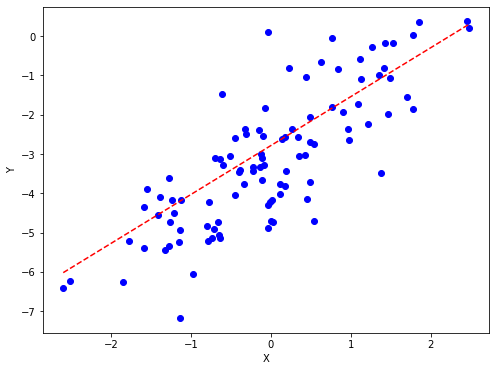

In [318]:
linspace = np.linspace(X.min(), X.max(), num = 100)

plt.figure(figsize=(8, 6))
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, y, "bo");
plt.plot(linspace , slope_ * linspace + intercept_, "r--");